# XGboost model

XGboost is another tree based model which is known for high perfomance. Therefore we eplore this option to compare with the other tree based random forest model. Steps again are the same for this model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [4]:
def calculate_centroid_and_area(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(30, 70, 20), (80, 255, 255))
    
    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)
    
    return [area,centroid]

In [5]:
# Assumes there are an equal number of top and front images
number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []
    
    row.append("Plant" + str(x+1))
    
    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')
    
    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)
    
    row = row + front_result + top_result
    
    results.loc[len(results)] = row
    
print(results)
    

   Plant_number  Area_front                           Centroid_front  \
0        Plant1     75518.0  (323.06533541672184, 667.4142853359464)   
1        Plant2     76249.0  (332.69353040695614, 699.1289066086113)   
2        Plant3     44534.0  (401.87218754210267, 650.1898773970449)   
3        Plant4     71101.0    (320.9960338110575, 693.329376520724)   
4        Plant5     60369.0   (350.9807848399013, 750.0965727442892)   
5        Plant6     39877.0   (376.9362038267673, 716.3728715801088)   
6        Plant7     62183.0   (400.5010694241191, 661.2424617660776)   
7        Plant8     76078.0    (420.333815294829, 645.5247246247272)   
8        Plant9     67271.0   (436.5337366770228, 658.2362979590016)   
9       Plant10     50986.0  (409.22655238692977, 640.7716628093987)   
10      Plant11     62705.0   (392.8908699465752, 682.1589027988199)   
11      Plant12    101738.0   (352.4703650553382, 666.6379917041813)   
12      Plant13     96423.0  (352.12431681237877, 695.6229530298

In [6]:
PlantData = pd.read_csv("../PlantData.csv")

In [7]:
Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

In [8]:
Data

,Plant_number,Area_front,Centroid_front,Area_top,Centroid_top,LAI
0,Plant1,75518.0,"(323.06533541672184, 667.4142853359464)",95805.0,"(268.9001617869631, 689.7002452899118)",720.31
1,Plant2,76249.0,"(332.69353040695614, 699.1289066086113)",101192.0,"(308.01920112261837, 672.0332338524785)",843.04
2,Plant3,44534.0,"(401.87218754210267, 650.1898773970449)",58495.0,"(348.781793315668, 682.289717069835)",486.23
3,Plant4,71101.0,"(320.9960338110575, 693.329376520724)",87672.0,"(333.012615202117, 683.0358837485172)",826.31
4,Plant5,60369.0,"(350.9807848399013, 750.0965727442892)",77101.0,"(328.5638967069169, 605.6901077807032)",755.65
5,Plant6,39877.0,"(376.9362038267673, 716.3728715801088)",58977.0,"(381.90167353375045, 629.8197093782322)",750.63
6,Plant7,62183.0,"(400.5010694241191, 661.2424617660776)",59821.0,"(312.7999699102322, 739.7305795623611)",492.84
7,Plant8,76078.0,"(420.333815294829, 645.5247246247272)",67922.0,"(315.4185978033627, 740.2675863490474)",797.91
8,Plant9,67271.0,"(436.5337366770228, 658.2362979590016)",59761.0,"(319.75457237998023, 728.2413446896805)",609.88
9,Plant10,50986.0,"(409.22655238692977, 640.7716628093987)",62153.0,"(363.07357649670973, 740.9204382732934)",661.81


In [14]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = Data.drop(columns = ['LAI']).copy()
y = Data['LAI']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [18]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)

xgb_model.fit(X_train[["Area_top","Area_front"]], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

The XGboost model shows significantly worse results than the random forest with a MAE of 12,8%. We think this is caused by the low sample size nature of our problem which XGboost can struggle with. Due to the low performance this method will be disregarded going forward.

135.67985400390626
   Actuals  Predictions  Plant Numbers
2   492.84   694.526123              1
1   609.88   694.526123              2
4   797.91   843.932678              3
3   903.49  1149.945435              4
8  1176.22  1303.346680              5
9  1270.20  1309.586426              6
7  1288.98   883.797546              7
5  1338.75  1314.878662              8
0  1340.06  1236.835571              9
6  1363.92  1284.723145             10


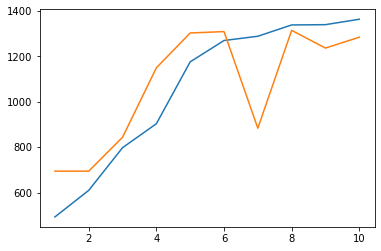

In [19]:
X_test = X_rem[["Area_top","Area_front"]]

close_predictions = xgb_model.predict(X_test)   

mae = sum(abs(close_predictions - y_rem)) / y_rem.shape[0]


print(mae)
xgb_results = pd.DataFrame(columns = ['Actuals'])
xgb_results['Predictions'] = close_predictions
xgb_results['Actuals'] = y_rem.to_list()




xgb_results.sort_values(by=['Actuals'],inplace = True)
xgb_results['Plant Numbers'] = np.arange(1,11).tolist()
print(xgb_results)

plt.plot(xgb_results['Plant Numbers'],xgb_results['Actuals'],xgb_results['Plant Numbers'],xgb_results['Predictions'])

In [20]:
mae/np.average(xgb_results['Actuals'])

0.12821456117924473